## Data cleanup and imports

In [10]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

### Concat csv files to one csv

In [2]:
path = './Sales_Data/'
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(f'{path}/{file}')
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv('all_data.csv', index=False)

### Read csv to pandas dataframe

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


### Clean data and drop NaN

In [5]:
#drop nan
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


In [35]:
#remove rows with 'Product' in product column
all_data = all_data[~all_data['Product'].str.contains('Product')]
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Make int


product_quantities = all_data.groupby('Product')['Quantity Ordered'].sum()
product_quantities



Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

### Pie chart with most sold items

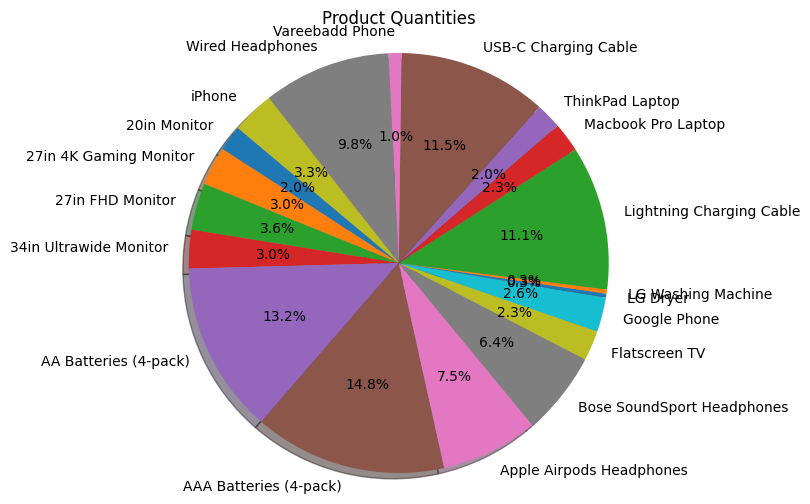

In [36]:
plt.figure(figsize=(10, 6))
plt.pie(product_quantities.values, labels=product_quantities.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Product Quantities')
plt.show()

### Same, just with a cleaner bar chart

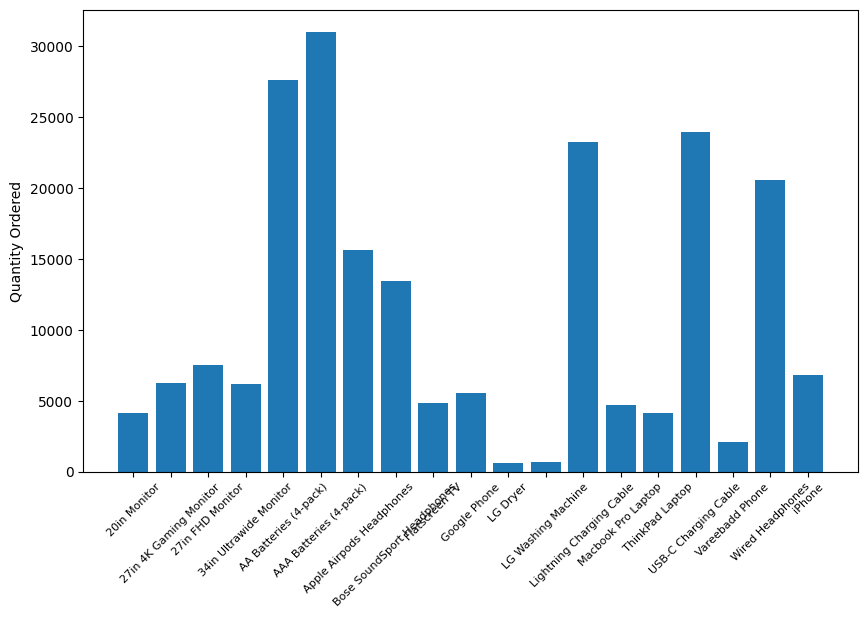

In [40]:
#create bar chart from product_quantities
plt.figure(figsize=(10, 6))
plt.bar(product_quantities.index, product_quantities.values)
plt.xticks(rotation=45, size=8)
plt.ylabel('Quantity Ordered')

plt.show()

## Which month has the most sales?

In [56]:
all_data['Sales'] = all_data['Quantity Ordered'].astype(int) * all_data['Price Each'].astype(float)
#add month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.groupby(['Month']).sum()

/var/folders/4d/gcfrd7757vb6dtk08cq18x1c0000gn/T/ipykernel_16027/766648396.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Month']).sum()


,Quantity Ordered,Sales
Month,,
01,10903,1822256.73
02,13449,2202022.42
03,17005,2807100.38
04,20558,3390670.24
05,18667,3152606.75
06,15253,2577802.26
07,16072,2647775.76
08,13448,2244467.88
09,13109,2097560.13


/var/folders/4d/gcfrd7757vb6dtk08cq18x1c0000gn/T/ipykernel_16027/566572373.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])


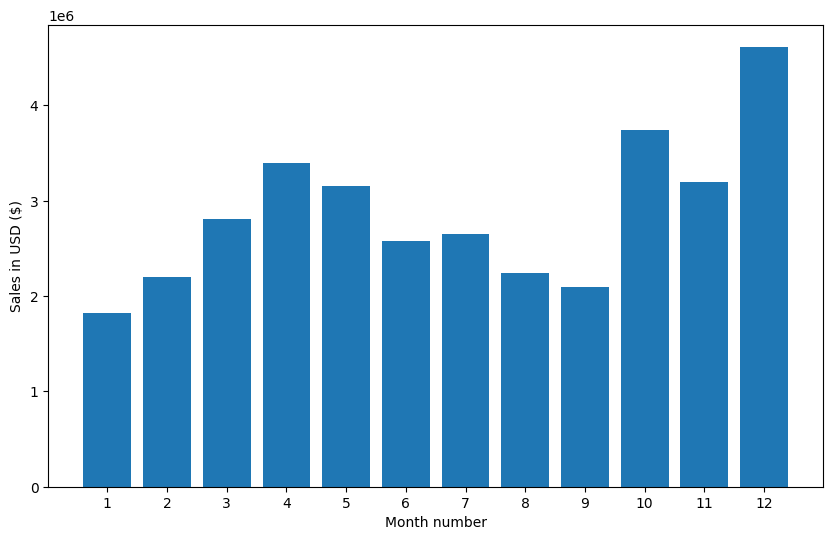

In [55]:
#create bar chart from sales by month
months = range(1, 13)
plt.figure(figsize=(10, 6))
plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Which city orders the most?

In [62]:
#add city column
def get_city(address):
    return address.split(',')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)}')
all_data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12,New York City
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",3.84,12,New York City
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",11.95,12,Portland
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",23.90,12,Dallas
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",99.99,12,Dallas
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",11.96,12,Dallas


In [65]:
all_data.groupby(['City']).sum()

/var/folders/4d/gcfrd7757vb6dtk08cq18x1c0000gn/T/ipykernel_16027/4158429969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['City']).sum()


,Quantity Ordered,Sales
City,,
Atlanta,16602,2795498.58
Austin,11153,1819581.75
Boston,22528,3661642.01
Dallas,16730,2767975.40
Los Angeles,33289,5452570.80
New York City,27932,4664317.43
Portland,14053,2320490.61
San Francisco,50239,8262203.91
Seattle,16553,2747755.48


/var/folders/4d/gcfrd7757vb6dtk08cq18x1c0000gn/T/ipykernel_16027/2761100350.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in all_data.groupby(['City'])]
/var/folders/4d/gcfrd7757vb6dtk08cq18x1c0000gn/T/ipykernel_16027/2761100350.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys, all_data.groupby(['City']).sum()['Sales'])


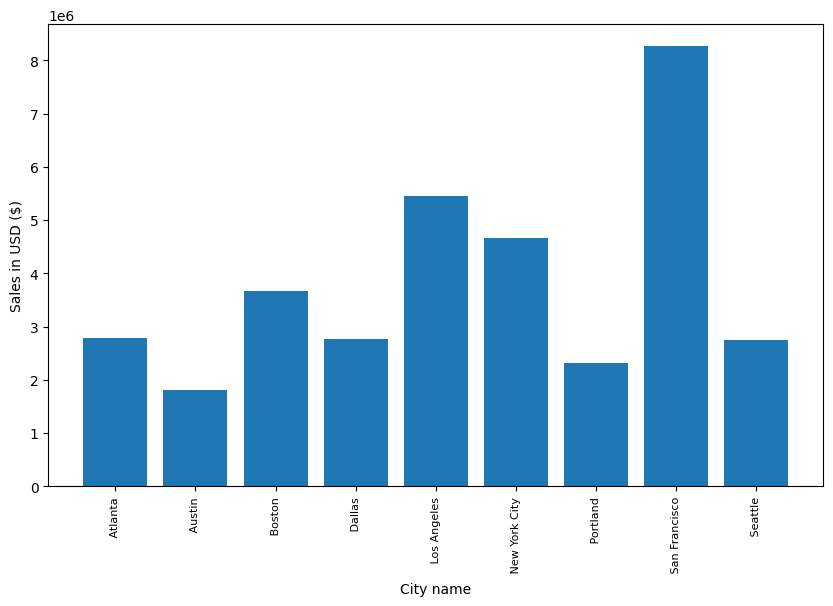

In [66]:
keys = [city for city, df in all_data.groupby(['City'])]
#create bar chart for sales by city
plt.figure(figsize=(10, 6)) 
plt.bar(keys, all_data.groupby(['City']).sum()['Sales'])
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

### When are the orders placed? How can we leverage this info with marketing?

In [82]:
#count occurences of what hour of the day recieved most orders
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1


hour_counts = all_data['Hour'].value_counts()
print(f'Hour with most orders: {hour_counts.idxmax()} with {hour_counts.max()} orders')


Hour with most orders: 19 with 12905 orders


/var/folders/4d/gcfrd7757vb6dtk08cq18x1c0000gn/T/ipykernel_16027/856443129.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [hour for hour, df in all_data.groupby(['Hour'])]


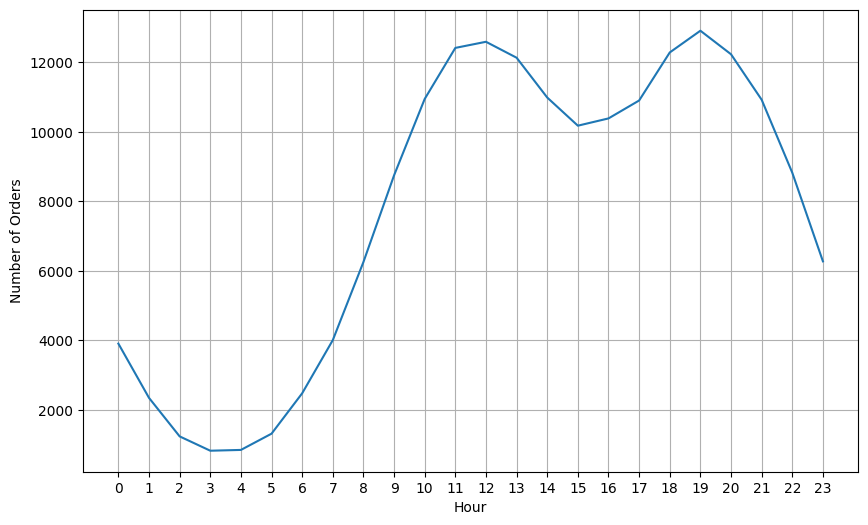

In [84]:
#display hour counts in line graph
keys = [hour for hour, df in all_data.groupby(['Hour'])]
plt.figure(figsize=(10, 6))
plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

### Which items are often sold together?

In [99]:
from itertools import combinations
from collections import Counter

order_products = all_data.groupby('Order ID')['Product'].apply(list)

# Initialize a Counter to count combinations of products
product_combinations_count = Counter()

# Iterate over each order's products and count combinations
for products in order_products:
    # Generate all 2-item combinations for the products in the order
    product_combinations = combinations(products, 2)
    # Increment the count for each combination
    product_combinations_count.update(product_combinations)

product_combinations_count.most_common(10)



[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### What items are sold the most and why?

/var/folders/4d/gcfrd7757vb6dtk08cq18x1c0000gn/T/ipykernel_16027/78455869.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_quantities.index, rotation=90)


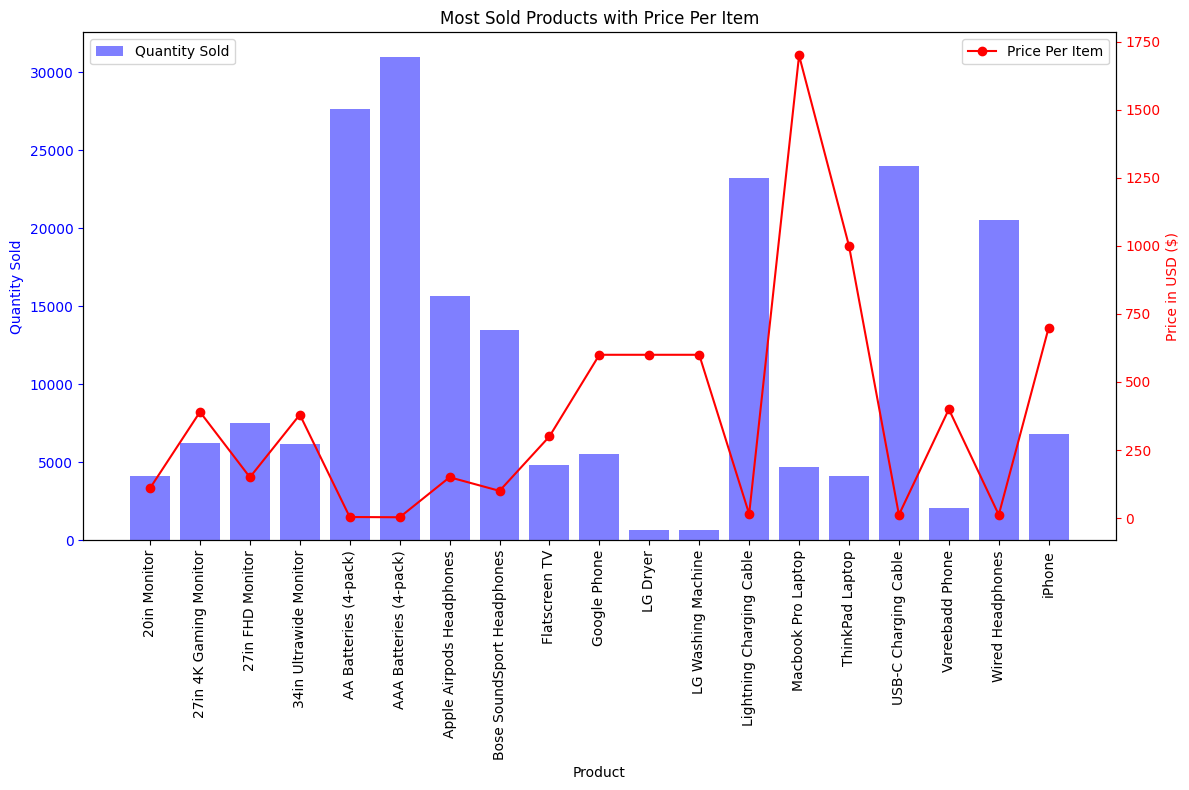

In [117]:
#find products that are sold the most
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
product_quantities = all_data.groupby('Product')['Quantity Ordered'].sum()
product_prices = all_data.groupby('Product')['Price Each'].mean()

# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the most sold products as a bar chart
ax1.bar(product_quantities.index, product_quantities.values, color='b', alpha=0.5, label='Quantity Sold')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticklabels(product_quantities.index, rotation=90)  

# Create a second y-axis to plot the price per item as a line
ax2 = ax1.twinx()
ax2.plot(product_prices.index, product_prices.values, color='r', marker='o', label='Price Per Item')
ax2.set_ylabel('Price in USD ($)', color='r')
ax2.tick_params('y', colors='r')

# Show legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.title('Most Sold Products with Price Per Item')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

